# Travelling Salesman

We will use the QuickGA library to compute hueristic solutions to the [Travelling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem).


In [6]:
from math import sqrt
import random
from matplotlib import pyplot as plt
from quickga import Organism, PermutationSequenceTrait

First we need to generate the set of points for which we want to find the shortest connecting path

We also define a function that can take a list of indices and graph a path depending on the order of the indices

In [7]:
points = [(random.randint(0,1000), random.randint(0,1000)) for i in range(20)]

def plot_path(indice_sequence):
    plot_line_segment = lambda a, b: plt.plot([a[0], b[0]], [a[1], b[1]])
    for i in range(len(indice_sequence)):
        plot_line_segment(points[indice_sequence[i]], points[indice_sequence[i-1]])
    plt.show()

Next we define our "Organism"

We only need it to have one trait: A permutation of the indices for our points. For this, we will generate all indices [0,1,...,n] for n points, and create a new PermutationSequenceTrait. This is a trait can handle the crossing over and mutation of lists which represent permutations of a set, in our case the indices of points visited.

We must also define a way to evaulate each "Organism": For this we will simply calculate the total distance from point to point in a loop. However, because we want a higher value to represent a better solution, we will take the inverse of this value.

In [8]:
class TravelingSalesman(Organism):
    def __init__(self):
        super().__init__()
        indices = [i for i in range(len(points))]
        self.add_trait('sequence', PermutationSequenceTrait(indices, mutation_type='inversion'))

    def evaluate(self):
        total_distance = 0
        distance = lambda a, b: sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
        ordered_points = [points[i] for i in self.sequence]
        for i in range(len(ordered_points)):
            total_distance += distance(ordered_points[i], ordered_points[i-1])
        return 1/total_distance

Now all we need to do is evolve the "Organism" on the set of points defined above.

We will use a population size of 100 per generation and run for 1000 generations. We will keep the top 5% of solutions and pass directly to next generation. We will also introduce new solutions to the parent pool each generation. The number of new solutions will be 20% of the generation size, meaning in our case we will introduce 1000 * 0.2 = 200 new solutions to the parent pool each generation

In [9]:
info = TravelingSalesman.evolve(population_size=100, generations=1000, elite_rate=0.05, migration_rate=0.2)


And finally we will graph the best solution, as well as the max fitness from generation to generation

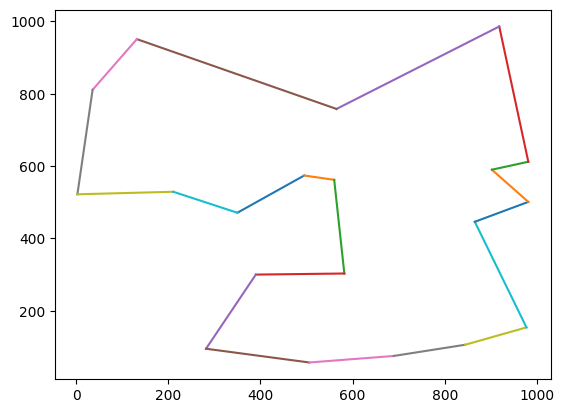

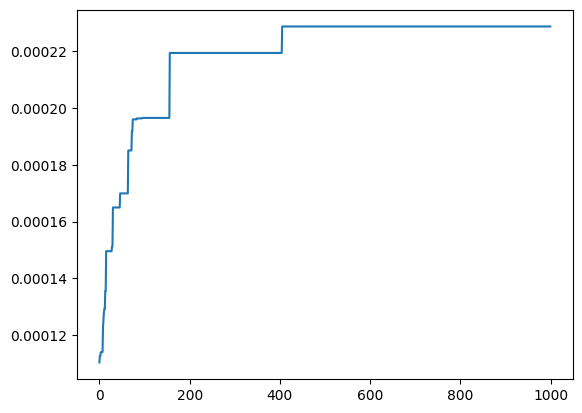

In [10]:
plot_path(info[-1]['most_fit'].sequence)
plt.plot([gen['max_fitness'] for gen in info])
plt.show()